In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


/accounts/grad/wtorous/rule-vetting


In [61]:
import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset

In [62]:
dfs = Dataset().get_data(keep_na=False)

In [63]:
eda_df = dfs[0]

In [64]:
posthoc_columns = [col for col in eda_df.columns if 'posthoc' in col]
#eda_df.drop(posthoc_columns,axis=1,inplace=True)

In [65]:
print(list(eda_df.shape))

[1704, 96]


In [66]:
outcome_def = 'csi_injury'

In [67]:
eda_df.columns

Index(['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck',
       'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head',
       'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk', 'Predisposed',
       'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar',
       'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop',
       'Clotheslining', 'CervicalSpineImmobilization', 'GCSEye', 'MotorGCS',
       'VerbalGCS', 'TotalGCS', 'PtCompPainFace', 'PtCompPainHead',
       'PtTenderNeck', 'PtTenderFace', 'PtTenderHead',
       'posthoc_CervicalSpinePrecautionsCC',
       'posthoc_CervicalSpinePrecautionsRLB',
       'posthoc_CervicalSpinePrecautionsOther',
       'posthoc_IntervForCervicalStabSCollar',
       'posthoc_IntervForCervicalStabRCollar',
       'posthoc_IntervForCervicalStabBrace',
       'posthoc_IntervForCervicalStabTraction',
       'posthoc_IntervForCervicalStabSurgical',
       'posthoc_IntervForCervicalStabHalo',
       '

In [68]:
eda_df['GCS_na']

id       case_id  site  control_type
110001   110001   1     case            0.0
110021   110021   1     case            0.0
110019   110019   1     case            0.0
110002   110002   1     case            0.0
110011   110011   1     case            0.0
                                       ... 
1723134  1713099  17    ems             0.0
1723165  1713124  17    ems             0.0
1723141  1713104  17    ems             0.0
1723147  1713105  17    ems             0.0
1723135  1713119  17    ems             0.0
Name: GCS_na, Length: 1704, dtype: float64

In [69]:
# get list of columns with only two recorded outcomes
binary_columns = eda_df.columns[eda_df.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cont_columns = eda_df.columns[eda_df.nunique()!=2]
cont_eda_data = eda_df.loc[:,cont_columns].copy()
cont_eda_data.loc[:,outcome_def] = eda_df.loc[:,outcome_def].copy() #add binary outcome indicator back in

In [70]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cont_eda_data.shape)

(1704, 96)
(1704, 87)
(1704, 10)


In [71]:
print(cont_eda_data.head())

                                  GCSEye  MotorGCS  VerbalGCS  TotalGCS  \
id     case_id site control_type                                          
110001 110001  1    case             1.0       1.0        1.0       3.0   
110021 110021  1    case             4.0       6.0        5.0      15.0   
110019 110019  1    case             4.0       6.0        5.0      15.0   
110002 110002  1    case             4.0       6.0        5.0      15.0   
110011 110011  1    case             4.0       6.0        5.0      15.0   

                                               posthoc_Race posthoc_PayorType  \
id     case_id site control_type                                                
110001 110001  1    case                              White                CI   
110021 110021  1    case                              White                ND   
110019 110019  1    case                              White                CI   
110002 110002  1    case          Black or African American          

In [72]:
print(np.unique(eda_df.index.get_level_values('control_type')))

['case' 'ems' 'moi' 'ran']


# Summary EDA

In [73]:
eda_df.describe()

,AlteredMentalStatus,LOC,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,TenderNeck,Torticollis,SubInj_Head,SubInj_Face,SubInj_Ext,...,CTPerformed_outside_binary,MRIPerformed_outside_binary,posthoc_Xrays_site_binary,posthoc_CTPerformed_site_binary,posthoc_MRIPerformed_site_binary,NonVerbal,YoungAdult,HighRiskFallDownStairs,PainNeck_Robust,GCS_na
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,...,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,0.176643,0.378521,0.122066,0.343897,0.299296,0.382042,0.049883,0.123826,0.044601,0.092136,...,0.370892,0.026995,0.907277,0.327465,0.128521,0.187793,0.461854,0.017606,0.322183,0.061620
std,0.381478,0.485161,0.327458,0.475147,0.458084,0.486029,0.217766,0.329480,0.206487,0.289303,...,0.483185,0.162117,0.290129,0.469426,0.334767,0.390662,0.498689,0.131552,0.467450,0.240534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
binary_imputed_data = binary_eda_data.fillna(0)
print(binary_eda_data.shape, binary_imputed_data.shape)
binary_corrs = binary_imputed_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(cont_corrs)

(1704, 87) (1704, 87)
              GCSEye  MotorGCS  VerbalGCS  TotalGCS  csi_injury
GCSEye      1.000000  0.815939   0.790269  0.832520    0.004388
MotorGCS    0.815939  1.000000   0.846215  0.866670    0.007385
VerbalGCS   0.790269  0.846215   1.000000  0.951456   -0.006260
TotalGCS    0.832520  0.866670   0.951456  1.000000   -0.006504
csi_injury  0.004388  0.007385  -0.006260 -0.006504    1.000000


Text(0.5, 0.98, 'Spearman Correlation of Binary Covariates with Mean Imputation')

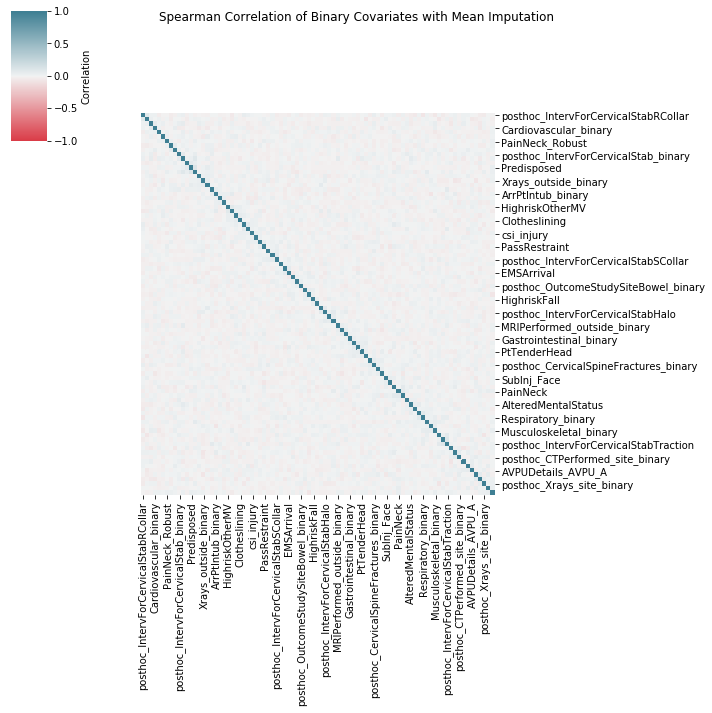

In [83]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)
binary_corrmap.fig.suptitle("Spearman Correlation of Binary Covariates with Mean Imputation")

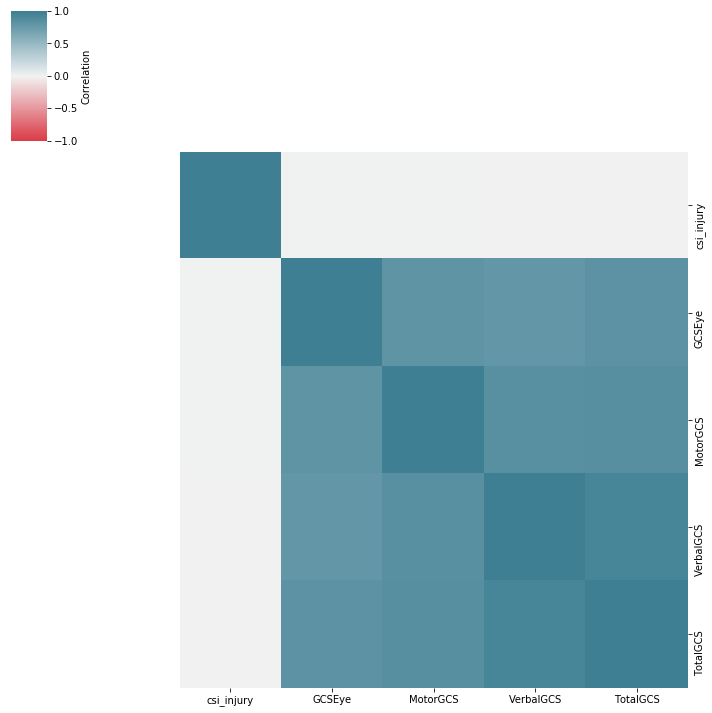

In [84]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
#vals = binary_corrs[outcome_def]
vals = binary_corrs['GCSnot15']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:20], vals[args][:20])
plt.xlabel('Correlation w/ GCS Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Bottom 20 Correlations")
plt.show()

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
confusion_matrix = pd.crosstab(binary_imputed_data['AlteredMentalStatus'], binary_imputed_data['AVPUDetails_AVPU_A'], rownames=['AlteredMentalStatus'], colnames=['GCS=15'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for GCS Imputation from AVPU=A")
plt.show()


In [ ]:
print(eda_df['TotalGCS'])

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = cont_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs, vals[args])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(binary_corrs['GCS_NA_total'].sort_values())

# EDA of Missingness

In [ ]:
# get percent missing by column
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("25 Covariates with Highest Percent Missingness\n")
print("All Covariates:")
missing_frac = (eda_df.isna().sum() / eda_df.shape[0]) * 100
print(missing_frac.sort_values(ascending=False)[:])

In [ ]:
complete_covar = missing_frac[missing_frac==0.]
print("Covar. with no missing data:",len(complete_covar))

missing_columns = missing_frac[missing_frac!=0]
print("Covar. with some missing data:",len(missing_columns))

In [ ]:
binary_missing_bools = eda_df[missing_columns.index].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

In [ ]:
corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.title("Correlation of Missigness by Covariate")

In [ ]:
print(max(binary_missing_corrs))

In [ ]:
print(sorted(binary_missing_corrs.iloc[:,3]))

# EDA of Demographic Data

In [ ]:
eda_demographic_df = pd.read_csv("data/csi_pecarn/raw/demographics.csv").set_index(["studysubjectid"])
print(eda_demographic_df.columns)

In [ ]:
gender_df = eda_demographic_df.groupby('site')['Gender'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Variable Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
race_df = eda_demographic_df.groupby('site')['Race'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Variable Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
ethnicity_df = eda_demographic_df.groupby('site')['Ethnicity'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Variable Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
payor_df = eda_demographic_df.groupby('site')['PayorType'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Payor Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
age_df = eda_demographic_df[['site','AgeInYears']]


bins = [0, 2, 5, 10, 13, np.inf]
names = ['<2', '2-5', '5-10', '10-13', '13+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()
